In [1]:
library('clonevol')
library(tidyr)
library(tidyverse)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.4.4       ✔ purrr   1.0.2  
✔ tibble  3.2.1       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.5.0  
✔ ggplot2 3.4.4       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [27]:
loci <- read.table("/home/rania/Documents/Tina/WES/T_608/loci_T_608.tsv", header = T)

In [28]:
## The cluster should be named by contiguous integer numbers, starting from 1
## pyclone clusters start from 0

loci$cluster_id <- loci$cluster_id + 1
loci.cp = subset(loci, select = -c(cellular_prevalence_std,variant_allele_frequency))
#head(loci.cp)

# The arguments to spread():
# - data: Data object
# - key: Name of column containing the new column names
# - value: Name of column containing values

data_wide_cp <- loci.cp %>% group_by(mutation_id) 
data_wide_cp <- spread(data_wide_cp, sample_id, cellular_prevalence)

colnames(data_wide_cp) <- c('mutation_id','gene','is.driver','cluster','T1_608_cp','T_608_cp')
#head(data_wide_cp)

loci.vaf = subset(loci, select = -c(cellular_prevalence_std,cellular_prevalence,gene,is.driver,cluster_id))
#head(loci.vaf)

data_wide_vaf <- loci.vaf %>% group_by(mutation_id) 
data_wide_vaf <- spread(data_wide_vaf, sample_id, variant_allele_frequency)

colnames(data_wide_vaf) <- c('mutation_id','T1_608_vaf','T_608_vaf')
#head(data_wide_vaf)

d <- merge(data_wide_cp, data_wide_vaf)
head(d)

mutation_id,gene,is.driver,cluster,T1_608_cp,T_608_cp,T1_608_vaf,T_608_vaf
AC004702.1:chr17:20321618:T:C:rs752728925,AC004702.1,FALSE,2,0.9779195,0.6154080,0.03426791,0.03426791
AC015818.7:chr17:20503841:A:C:rs610841,AC015818.7,FALSE,2,0.9836874,0.6194315,0.07291667,0.07291667
AC015818.9:chr17:20416503:T:C:rs71263794,AC015818.9,FALSE,2,0.9821414,0.6190175,0.06666667,0.06666667
AC015818.9:chr17:20416658:G:A:rs71263795,AC015818.9,FALSE,1,0.9874337,0.6219734,0.08000000,0.08000000
AC087203.1:chr8:12374513:A:G:novel,AC087203.1,FALSE,1,0.9951100,0.6322203,0.19565217,0.19565217
AC233702.4:chr17:21657101:C:T:rs1418919501,AC233702.4,FALSE,1,0.9952287,0.6388105,0.30000000,0.30000000


In [29]:
vaf.col.names <- grep('.vaf', colnames(d), value=T)
vaf.col.names

[1] "T1_608_vaf" "T_608_vaf"

In [30]:
cp.col.names <- grep('.cp', colnames(d), value=T)
cp.col.names

[1] "T1_608_cp" "T_608_cp"

In [31]:
sample.names <- c('T1_608_cp','T_608_cp')
sample.names

[1] "T1_608_cp" "T_608_cp"

In [32]:
# prepare sample grouping
sample.groups <- c('T1_608_cp','T_608_cp');
names(sample.groups) <- cp.col.names

# setup the order of clusters to display in various plots (later)
d <- d[order(d$cluster),]

head(d)

,mutation_id,gene,is.driver,cluster,T1_608_cp,T_608_cp,T1_608_vaf,T_608_vaf
4,AC015818.9:chr17:20416658:G:A:rs71263795,AC015818.9,FALSE,1,0.9874337,0.6219734,0.0800000,0.0800000
5,AC087203.1:chr8:12374513:A:G:novel,AC087203.1,FALSE,1,0.9951100,0.6322203,0.1956522,0.1956522
6,AC233702.4:chr17:21657101:C:T:rs1418919501,AC233702.4,FALSE,1,0.9952287,0.6388105,0.3000000,0.3000000
7,AC233702.4:chr17:21657174:C:T:rs1170297100,AC233702.4,FALSE,1,0.9954707,0.6427845,0.4615385,0.4615385
8,ADGRE5:chr19:14388171:T:G:novel,ADGRE5,FALSE,1,0.9943260,0.6269363,0.1428571,0.1428571
9,AGPAT5:chr8:6708585:T:G:rs909594498,AGPAT5,FALSE,1,0.9951918,0.6367489,0.2222222,0.2222222


In [33]:
library(RColorBrewer)
# choose colors for the clones
clone.colors <- c(brewer.pal(n = 8, name = "Dark2"))

In [34]:
# Visualizing the variant clusters --> VAF
pdf('box.pdf', width = 5, height = 5, useDingbats = FALSE, title='')
pp <- plot.variant.clusters(d,
cluster.col.name = 'cluster',
show.cluster.size = FALSE,
cluster.size.text.color = 'blue',
vaf.col.names = vaf.col.names,    ##maybe you want ccf in the plot
vaf.limits = 1,
sample.title.size = 10,
violin = FALSE,
box = FALSE,
jitter = TRUE,
jitter.shape = 1,
jitter.color = clone.colors,
jitter.size = 2,
jitter.alpha = 1,
jitter.center.method = 'median',
jitter.center.size = 1,
jitter.center.color = 'darkgray',
jitter.center.display.value = 'none',
highlight = 'is.driver',
highlight.shape = 15,
highlight.color = 'blue',
highlight.fill.color = 'green',
highlight.note.col.name = 'gene',
highlight.note.size = 2,
order.by.total.vaf = FALSE)
dev.off()

Warning message:
“The `show_guide` argument of `layer()` is deprecated as of ggplot2 2.0.0.
ℹ Please use the `show.legend` argument instead.
ℹ The deprecated feature was likely used in the clonevol package.
  Please report the issue to the authors.”

png 
  2

In [35]:
# Visualizing the variant clusters  --> CP
pdf('box2.pdf', width = 5, height = 5, useDingbats = FALSE, title='')
pp <- plot.variant.clusters(d,
cluster.col.name = 'cluster',
show.cluster.size = FALSE,
cluster.size.text.color = 'blue',
vaf.col.names = cp.col.names,    ##maybe you want ccf in the plot
vaf.limits = 1,
sample.title.size = 10,
violin = FALSE,
box = FALSE,
jitter = TRUE,
jitter.shape = 1,
jitter.color = clone.colors,
jitter.size = 2,
jitter.alpha = 1,
jitter.center.method = 'median',
jitter.center.size = 1,
jitter.center.color = 'darkgray',
jitter.center.display.value = 'none',
highlight = 'is.driver',
highlight.shape = 15,
highlight.color = 'blue',
highlight.fill.color = 'green',
highlight.note.col.name = 'gene',
highlight.note.size = 2,
order.by.total.vaf = FALSE)
dev.off()

png 
  2

In [36]:
# shorten cp column names as they will be
cp.col.names <- grep('cp', colnames(d), value=T)
sample.names <- gsub('_cp', '', cp.col.names)
d[, sample.names] <- d[, cp.col.names]
cp.col.names <- sample.names
# prepare sample grouping
sample.groups <- c('T1_608_cp','T_608_cp');
names(sample.groups) <- cp.col.names
# setup the order of clusters to display in various plots (later)
d <- d[order(d$cluster),]

In [37]:
d$T1_608_cp <-  as.numeric(as.character(d$T1_608_cp))
d$T_608_cp <-  as.numeric(as.character(d$T_608_cp))
d$T1_608 <-  as.numeric(as.character(d$T1_608))
d$T_608 <-  as.numeric(as.character(d$T_608))
d$cluster <- as.character(d$cluster)
d$gene <- as.character(d$gene)
d$mutation_id <- as.character(d$mutation_id)

str(d) 

'data.frame':	299 obs. of  10 variables:
 $ mutation_id: chr  "AC015818.9:chr17:20416658:G:A:rs71263795" "AC087203.1:chr8:12374513:A:G:novel" "AC233702.4:chr17:21657101:C:T:rs1418919501" "AC233702.4:chr17:21657174:C:T:rs1170297100" ...
 $ gene       : chr  "AC015818.9" "AC087203.1" "AC233702.4" "AC233702.4" ...
 $ is.driver  : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ cluster    : chr  "1" "1" "1" "1" ...
 $ T1_608_cp  : num  0.987 0.995 0.995 0.995 0.994 ...
 $ T_608_cp   : num  0.622 0.632 0.639 0.643 0.627 ...
 $ T1_608_vaf : num  0.08 0.196 0.3 0.462 0.143 ...
 $ T_608_vaf  : num  0.08 0.196 0.3 0.462 0.143 ...
 $ T1_608     : num  0.987 0.995 0.995 0.995 0.994 ...
 $ T_608      : num  0.622 0.632 0.639 0.643 0.627 ...


In [49]:
# Plotting pairwise VAFs or CCFs across samples

plot.pairwise(d, col.names = cp.col.names,
                    out.prefix = 'variants.pairwise.plot',
                    xMinSmall = 0, xMaxSmall = 1, yMinSmall = 0, yMaxSmall = 1,
                    colors = clone.colors)


png 
  2

In [50]:
# Plotting mean/median of clusters across samples (cluster flow)
pdf('flow_cp.pdf', width=6, height=6, useDingbats=FALSE, title='')
plot.cluster.flow(d, vaf.col.names = cp.col.names,  ## plot ccfs 
                  sample.names = c('T1_608', 'T_608'),
                  vaf.in.percent = FALSE,
                  y.title = "Cellular Prevalence",
                  colors = clone.colors,
                  width=6, height=6)
dev.off()

png 
  2

In [51]:
# Plotting mean/median of clusters across samples (cluster flow)
pdf('flow_vaf.pdf', width=6, height=6, useDingbats=FALSE, title='')
plot.cluster.flow(d, vaf.col.names = vaf.col.names,  ## plot ccfs 
                  sample.names = c('T1_608', 'T_608'),
                  vaf.in.percent = FALSE,
                  y.title = "Variant Allele Frequencies",
                  colors = clone.colors,
                  width=6, height=6)
dev.off()

png 
  2

In [40]:
d.infermodel <- d

In [41]:
## Clonal models

y = infer.clonal.models(variants = d.infermodel,
cluster.col.name = 'cluster',  ## default name there is a bug
ccf.col.names = cp.col.names,
sample.groups = sample.groups,
cancer.initiation.model='monoclonal',
subclonal.test = 'bootstrap',
subclonal.test.model = 'non-parametric',
num.boots = 1000,
founding.cluster = 1,
cluster.center = 'mean',
ignore.clusters = NULL,  
clone.colors = clone.colors,
min.cluster.vaf = 0.01,
# min probability that CCF(clone) is non-negative
sum.p = 0.05,
# alpha level in confidence interval estimate for CCF(clone)
alpha = 0.05,
vaf.in.percent = FALSE)

Calculate VAF as CCF/2
Sample 1: T1_608 <-- T1_608
Sample 2: T_608 <-- T_608
Using monoclonal model
Generating non-parametric boostrap samples...
T1_608 : Enumerating clonal architectures...
Determining if cluster VAF is significantly positive...
Exluding clusters whose VAF < min.cluster.vaf=0.01
Non-positive VAF clusters:  
T1_608 : 1 clonal architecture model(s) found

T_608 : Enumerating clonal architectures...
Determining if cluster VAF is significantly positive...
Exluding clusters whose VAF < min.cluster.vaf=0.01
Non-positive VAF clusters:  
T_608 : 1 clonal architecture model(s) found

Finding consensus models across samples...
Found  1 consensus model(s)
Generating consensus clonal evolution trees across samples...
Found 1 consensus model(s)
Scoring models...
Pruning consensus clonal evolution trees....
Seeding aware pruning is:  off
Number of unique pruned consensus trees: 1 


In [42]:
y <- transfer.events.to.consensus.trees(y,
d.infermodel[d.infermodel$is.driver,],
cluster.col.name = 'cluster',
event.col.name = 'gene')

In [43]:
y <- convert.consensus.tree.clone.to.branch(y, branch.scale = 'sqrt')

In [44]:
## The T1_805, T2_805 columns that used to contain the ccf (cp) after the model is run have been changed
## I renamed the column names in order to plot the ccf in the final plot

colnames(y$variants)
colnames(y$variants) <- c('mutation_id','gene','is.driver','cluster','T1_608','T_608','T1_608_vaf','T_608_vaf','T1_608_aftermodel','T_608_aftermodel')

[1] "mutation_id" "gene"        "is.driver"   "cluster"     "T1_608_cp"  
 [6] "T_608_cp"    "T1_608_vaf"  "T_608_vaf"   "T1_608"      "T_608"

In [46]:
plot.clonal.models(y,
samples = c('T1_608','T_608'),
# box plot parameters
box.plot = TRUE,
fancy.boxplot = TRUE,
fancy.variant.boxplot.highlight = 'is.driver',
fancy.variant.boxplot.highlight.shape = 21,
fancy.variant.boxplot.highlight.fill.color = 'red',
fancy.variant.boxplot.highlight.color = 'black',
fancy.variant.boxplot.highlight.note.col.name = 'gene',
fancy.variant.boxplot.highlight.note.color = 'blue',
fancy.variant.boxplot.highlight.note.size = 2,
fancy.variant.boxplot.jitter.alpha = 1,
fancy.variant.boxplot.jitter.center.color = 'grey50',
fancy.variant.boxplot.base_size = 12,
fancy.variant.boxplot.plot.margin = 1,

fancy.variant.boxplot.vaf.suffix = '.CCF',
fancy.variant.boxplot.vaf.limits = 1,
# bell plot parameters
clone.shape = 'bell',
bell.event = TRUE,
bell.event.label.color = 'blue',
bell.event.label.angle = 60,
clone.time.step.scale = 1,
bell.curve.step = 2,
# node-based consensus tree parameters
merged.tree.plot = TRUE,
tree.node.label.split.character = NULL,
tree.node.shape = 'circle',
tree.node.size = 30,
tree.node.text.size = 0.5,
merged.tree.node.size.scale = 1.25,
merged.tree.node.text.size.scale = 2.5,
merged.tree.cell.frac.ci = FALSE,
# branch-based consensus tree parameters
merged.tree.clone.as.branch = TRUE,
mtcab.event.sep.char = ',',
mtcab.branch.text.size = 1,
mtcab.branch.width = 0.75,
mtcab.node.size = 3,
mtcab.node.label.size = 1,
mtcab.node.text.size = 1.5,
# cellular population parameters
cell.plot = TRUE,
num.cells = 100,
cell.border.size = 0.25,
cell.border.color = 'black',
clone.grouping = 'horizontal',
#meta-parameters
scale.monoclonal.cell.frac = TRUE,
show.score = FALSE,
cell.frac.ci = TRUE,
disable.cell.frac = FALSE,
# output figure parameters
out.dir = 'output',
out.format = 'pdf',
overwrite.output = TRUE,
width = 16,
height = 8,
# vector of width scales for each panel from left to right
panel.widths = c(3,4,2,4,2))


Attaching package: ‘igraph’

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:purrr’:

    compose, simplify

The following object is masked from ‘package:tibble’:

    as_data_frame

The following object is masked from ‘package:tidyr’:

    crossing

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



Plotting pruned consensus trees...
Output plots are in: output


In [47]:
library(fishplot)

Using fishPlot version 0.5.2


[1] 1


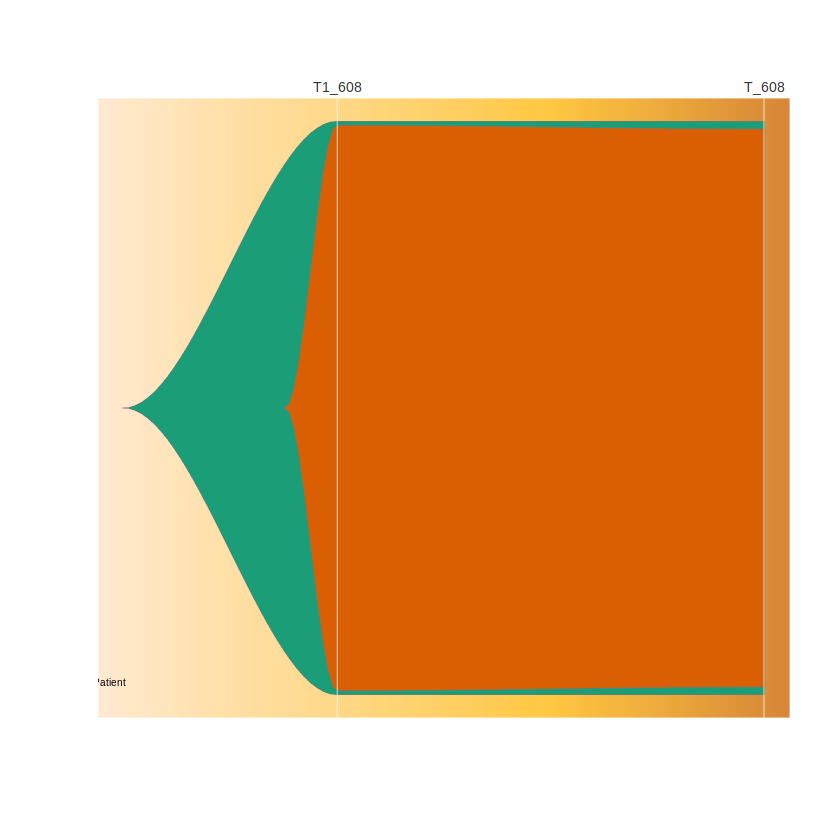

In [48]:
#create a list of fish objects 
f = generateFishplotInputs(results=y)
fishes = createFishPlotObjects(f)

fish = layoutClones(fishes[[1]])
fish = setCol(fish,f$clonevol.clone.colors)
fish.plot <- fishPlot(fish,shape="spline", title.btm="Patient", cex.title=0.5,
         vlines=seq(1, length(f$samples)), vlab=f$samples, pad.left=0.5)